# Analysis of `alarm_violations.csv` for Respiratory Rate

For each parameter ...
* Concerning alarm violations ...
  * Create a boxplot and stripplot based on the VALUENUM
  * Clean the data if necessary
  * Create histogram for cleaned VALUENUM  
* Concerning alarm thresholds ...
  * Create a boxplot and stripplot based on the THRESHOLD_VALUE (stratified by THRESHOLD_TYPE)
  * Clean the data if necessary
  * Create histogram for cleaned THRESHOLD_VALUE (stratified by THRESHOLD_TYPE)


## Import Data

In [3]:
# Overview of libraries used
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
alarm_violations = pd.read_csv('./alarm_violations.csv')
alarm_violations.head()

,ROW_ID,ICUSTAY_ID,ITEMID,CHARTTIME,VALUENUM,VALUEUOM,THRESHOLD_ROW_ID,THRESHOLD_ITEMID,THRESHOLD_CHARTTIME,THRESHOLD_VALUE,THRESHOLD_TYPE
0,188506,262147.0,220045,2108-02-21 19:00:00,127.0,bpm,188397,220046,2108-02-21 07:00:00,120.0,HIGH
1,188690,262147.0,220277,2108-02-22 03:55:00,89.0,%,188518,223770,2108-02-21 19:34:00,90.0,LOW
2,188742,262147.0,220277,2108-02-22 07:00:00,87.0,%,188723,223770,2108-02-22 04:22:00,88.0,LOW
3,188683,262147.0,220210,2108-02-22 03:50:00,38.0,insp/min,188519,224161,2108-02-21 19:34:00,35.0,HIGH
4,32060004,262154.0,224687,2105-12-09 00:30:00,3.0,L/min,32059994,220292,2105-12-09 00:30:00,3.5,LOW


## Parameter: Respiratory Rate (Number of Breaths per Minute)

* `220210` **Respiratory Rate** (RR), metavision, in insp/min (numeric)
* `224161` **Resp Alarm - High** (Resp Alarm - High), metavision, in insp/min (numeric)
* `224162` **Resp Alarm - Low** (Resp Alarm - Low), metavision, in insp/min (numeric)

### Respiratory Rate - Alarm Violations

In [5]:
RR_violations = alarm_violations[(alarm_violations['ITEMID'] == 220210)]
display(RR_violations)

,ROW_ID,ICUSTAY_ID,ITEMID,CHARTTIME,VALUENUM,VALUEUOM,THRESHOLD_ROW_ID,THRESHOLD_ITEMID,THRESHOLD_CHARTTIME,THRESHOLD_VALUE,THRESHOLD_TYPE
3,188683,262147.0,220210,2108-02-22 03:50:00,38.0,insp/min,188519,224161,2108-02-21 19:34:00,35.0,HIGH
74,32059616,262154.0,220210,2105-12-08 05:15:00,0.0,insp/min,32059244,224162,2105-12-07 19:25:00,8.0,LOW
75,32059622,262154.0,220210,2105-12-08 05:20:00,0.0,insp/min,32059244,224162,2105-12-07 19:25:00,8.0,LOW
76,32059628,262154.0,220210,2105-12-08 05:25:00,0.0,insp/min,32059244,224162,2105-12-07 19:25:00,8.0,LOW
77,32059857,262154.0,220210,2105-12-08 21:15:00,7.0,insp/min,32059819,224162,2105-12-08 20:00:00,8.0,LOW
...,...,...,...,...,...,...,...,...,...,...,...
388198,14458843,262135.0,220210,2161-06-19 14:00:00,33.0,insp/min,14458802,224161,2161-06-19 09:39:00,30.0,HIGH
388201,31342643,262139.0,220210,2131-05-18 17:00:00,36.0,insp/min,31342490,224161,2131-05-18 12:45:00,30.0,HIGH
388202,31342664,262139.0,220210,2131-05-18 20:00:00,31.0,insp/min,31342490,224161,2131-05-18 12:45:00,30.0,HIGH
388207,31386205,262140.0,220210,2160-07-29 18:00:00,34.0,insp/min,31386150,224161,2160-07-29 17:08:00,30.0,HIGH


In [6]:
RR_violations.VALUENUM.describe()

count    7.086100e+04
mean     5.831980e+01
std      8.848886e+03
min      0.000000e+00
25%      7.000000e+00
50%      3.100000e+01
75%      3.600000e+01
max      2.355555e+06
Name: VALUENUM, dtype: float64

<AxesSubplot:>

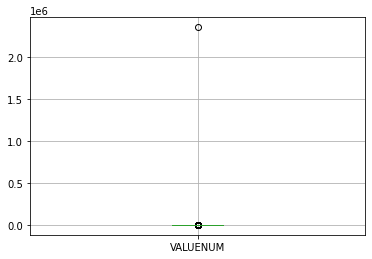

In [7]:
RR_violations.boxplot(column='VALUENUM')

Among the VALUENUM values is a maximum respiratory rate of 2.355.555 insp/min.
This appears to be at least one implausible outlier.

Let's check whether the unit (VALUEUOM) is "insp/min" for all respiratory rates (what is expected according to `D_ITEMS.csv`).

In [8]:
RR_violations.VALUEUOM.unique()

array(['insp/min'], dtype=object)

All respiratory rates are given in insp/min as expected.

Let's check the literature to see what respiratory rates can be expected based on medical knowledge.

* General range:
    * for adults: 12 to 20 insp/min
    * much higher for kids, especially for babies under 2 years (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3789232/figure/F2/)
* Abnormal values for adults: (https://onlinelibrary.wiley.com/doi/full/10.5694/j.1326-5377.2008.tb01825.x?casa_token=UjZimsSmcVIAAAAA%3A2cMU2S0v9D15Mx72WCOms4LbCztCJ0_TnZIheDI-qZ8x8a0VU7HWBRs6TTv9SGoqfHC0fSf5ctnduwA&sid=nlm%3Apubmed)
    * varies from over 14 to over 36 insp/min
    * over 20 insp/min = probably unwell
    * over 24  insp/min = likely to be critically ill
* Maximum Breathing Capacity (MBC):
    * "...has been determined with various expiratory and respiratory resistances (singly and combined) at breathing rates of 4–196 per minute." (https://journals.physiology.org/doi/abs/10.1152/jappl.1957.11.1.79)

Decision for now: Consider respiratory rates over 196 insp/min as implausible values to be removed before further analysis. Assume a threshold range from 10 to 70.

In [9]:
RR_violations_without_outlier = RR_violations[RR_violations['VALUENUM'] < 4000]
RR_violations_without_outlier.VALUENUM.describe()

count    70860.000000
mean        25.078239
std         36.191046
min          0.000000
25%          7.000000
50%         31.000000
75%         36.000000
max       3923.000000
Name: VALUENUM, dtype: float64

Text(0.5, 1.0, 'Respiratory Rate - Original Alarm Violations (without outlier)')

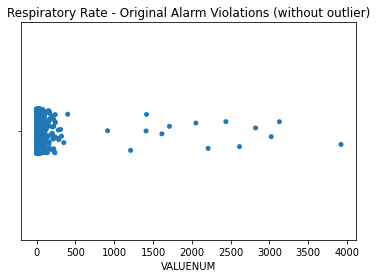

In [10]:
sns.stripplot(data=RR_violations_without_outlier, x='VALUENUM').set_title('Respiratory Rate - Original Alarm Violations (without outlier)')
#plt.savefig('RR_violations_original_stripplot.png', dpi=1200)

In [11]:
RR_violations_clean = RR_violations[RR_violations['VALUENUM'] <= 196]
RR_violations_above_196 = RR_violations[RR_violations['VALUENUM'] > 196]

In [12]:
display(RR_violations_above_196.sort_values(by=['VALUENUM']))
RR_violations_above_196.VALUENUM.describe()
len(RR_violations_above_196) # 41 were removed

,ROW_ID,ICUSTAY_ID,ITEMID,CHARTTIME,VALUENUM,VALUEUOM,THRESHOLD_ROW_ID,THRESHOLD_ITEMID,THRESHOLD_CHARTTIME,THRESHOLD_VALUE,THRESHOLD_TYPE
76967,14850108,283401.0,220210,2146-09-23 06:00:00,197.0,insp/min,14849931,224161,2146-09-22 20:15:00,30.0,HIGH
7756,27053804,264596.0,220210,2141-10-03 13:30:00,200.0,insp/min,27053655,224161,2141-10-03 12:17:00,35.0,HIGH
361026,21650,256064.0,220210,2166-01-20 19:10:00,200.0,insp/min,21504,224161,2166-01-20 08:10:00,30.0,HIGH
41635,32240162,274209.0,220210,2157-05-23 19:00:00,200.0,insp/min,32240011,224161,2157-05-23 08:00:00,30.0,HIGH
319811,16790183,245558.0,220210,2135-08-19 22:00:00,200.0,insp/min,16790164,224161,2135-08-19 20:33:00,30.0,HIGH
98162,27737501,289476.0,220210,2103-09-30 00:00:00,200.0,insp/min,27737473,224161,2103-09-29 20:00:00,35.0,HIGH
10290,30635389,265425.0,220210,2197-06-28 04:00:00,210.0,insp/min,30635204,224161,2197-06-27 20:00:00,35.0,HIGH
305548,27834103,241314.0,220210,2161-08-24 16:15:00,220.0,insp/min,27834025,224161,2161-08-24 15:01:00,35.0,HIGH
369584,25709700,258343.0,220210,2189-07-29 12:30:00,220.0,insp/min,25709620,224161,2189-07-29 10:30:00,35.0,HIGH
199109,8761423,212116.0,220210,2156-11-20 17:00:00,220.0,insp/min,8761283,224161,2156-11-20 08:00:00,30.0,HIGH


41

count      40.000000
mean      922.400000
std      1057.483025
min       197.000000
25%       220.000000
50%       280.000000
75%      1465.500000
max      3923.000000
Name: VALUENUM, dtype: float64

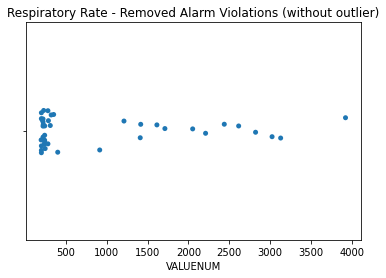

In [13]:
RR_violations_above_196 = RR_violations_above_196[RR_violations_above_196['VALUENUM'] < 4000]
sns.stripplot(data=RR_violations_above_196, x='VALUENUM').set_title('Respiratory Rate - Removed Alarm Violations (without outlier)')
#plt.savefig('RR_violations_removed_stripplot.png', dpi=1200)
RR_violations_above_196.VALUENUM.describe()

There is one extreme outlier, 14 values over 914 and 26 values between 196 and 400.
Maybe investigate jump from 400 to 914 and keep values up to 400.

In [14]:
# Check cleaned RR_violations
display(RR_violations_clean.sort_values(by=['VALUENUM']))
RR_violations_clean.VALUENUM.describe()

,ROW_ID,ICUSTAY_ID,ITEMID,CHARTTIME,VALUENUM,VALUEUOM,THRESHOLD_ROW_ID,THRESHOLD_ITEMID,THRESHOLD_CHARTTIME,THRESHOLD_VALUE,THRESHOLD_TYPE
320509,553693,245754.0,220210,2146-10-04 02:00:00,0.0,insp/min,553620,224162,2146-10-03 20:00:00,8.0,LOW
72270,571972,282019.0,220210,2168-01-08 19:43:00,0.0,insp/min,571873,224162,2168-01-08 07:52:00,8.0,LOW
72271,571974,282019.0,220210,2168-01-08 19:45:00,0.0,insp/min,571873,224162,2168-01-08 07:52:00,8.0,LOW
268900,2108978,230063.0,220210,2193-01-27 00:01:00,0.0,insp/min,2108818,224162,2193-01-26 07:53:00,8.0,LOW
167303,671316,203082.0,220210,2156-01-14 10:00:00,0.0,insp/min,671286,224162,2156-01-14 08:00:00,8.0,LOW
...,...,...,...,...,...,...,...,...,...,...,...
64733,18119509,279874.0,220210,2163-07-14 23:00:00,167.0,insp/min,18119469,224161,2163-07-14 19:32:00,30.0,HIGH
273543,32668914,231754.0,220210,2102-02-20 18:00:00,169.0,insp/min,32668779,224161,2102-02-20 07:48:00,40.0,HIGH
383596,14101439,261040.0,220210,2134-10-30 03:00:00,170.0,insp/min,14101307,224161,2134-10-29 20:07:00,30.0,HIGH
346085,4472174,251795.0,220210,2113-07-28 07:56:00,170.0,insp/min,4472167,224161,2113-07-28 07:53:00,35.0,HIGH


count    70820.000000
mean        24.571421
std         15.480895
min          0.000000
25%          7.000000
50%         31.000000
75%         36.000000
max        180.000000
Name: VALUENUM, dtype: float64

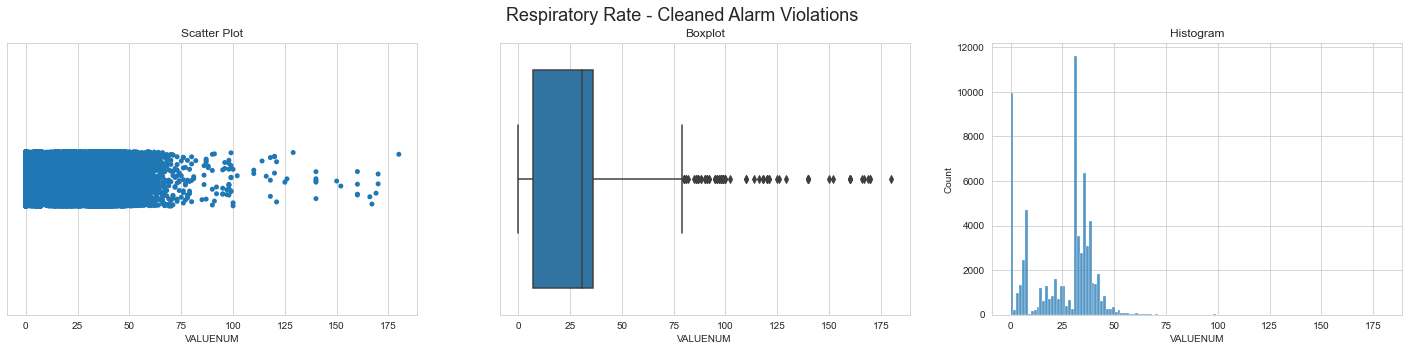

In [15]:
sns.set_style('whitegrid')

fig, axs = plt.subplots(1, 3, figsize=(25, 5))
fig.suptitle('Respiratory Rate - Cleaned Alarm Violations', fontsize=18)

sns.stripplot(data=RR_violations_clean, x='VALUENUM', ax=axs[0])
axs[0].set_title('Scatter Plot')
axs[0].set_xlabel('VALUENUM')

sns.boxplot(data=RR_violations_clean, x='VALUENUM', ax=axs[1])
axs[1].set_title('Boxplot')
axs[1].set_xlabel('VALUENUM')

sns.histplot(data=RR_violations_clean, x='VALUENUM', ax=axs[2])
axs[2].set_title('Histogram')
axs[2].set_xlabel('VALUENUM')

plt.show(fig)

### Respiratory Rate - Alarm Thresholds

In [16]:
display(RR_violations)

,ROW_ID,ICUSTAY_ID,ITEMID,CHARTTIME,VALUENUM,VALUEUOM,THRESHOLD_ROW_ID,THRESHOLD_ITEMID,THRESHOLD_CHARTTIME,THRESHOLD_VALUE,THRESHOLD_TYPE
3,188683,262147.0,220210,2108-02-22 03:50:00,38.0,insp/min,188519,224161,2108-02-21 19:34:00,35.0,HIGH
74,32059616,262154.0,220210,2105-12-08 05:15:00,0.0,insp/min,32059244,224162,2105-12-07 19:25:00,8.0,LOW
75,32059622,262154.0,220210,2105-12-08 05:20:00,0.0,insp/min,32059244,224162,2105-12-07 19:25:00,8.0,LOW
76,32059628,262154.0,220210,2105-12-08 05:25:00,0.0,insp/min,32059244,224162,2105-12-07 19:25:00,8.0,LOW
77,32059857,262154.0,220210,2105-12-08 21:15:00,7.0,insp/min,32059819,224162,2105-12-08 20:00:00,8.0,LOW
...,...,...,...,...,...,...,...,...,...,...,...
388198,14458843,262135.0,220210,2161-06-19 14:00:00,33.0,insp/min,14458802,224161,2161-06-19 09:39:00,30.0,HIGH
388201,31342643,262139.0,220210,2131-05-18 17:00:00,36.0,insp/min,31342490,224161,2131-05-18 12:45:00,30.0,HIGH
388202,31342664,262139.0,220210,2131-05-18 20:00:00,31.0,insp/min,31342490,224161,2131-05-18 12:45:00,30.0,HIGH
388207,31386205,262140.0,220210,2160-07-29 18:00:00,34.0,insp/min,31386150,224161,2160-07-29 17:08:00,30.0,HIGH


In [17]:
# Check respiratory rate alarm - HIGH threshold
RR_threshold_high = RR_violations[(RR_violations['THRESHOLD_TYPE'] == 'HIGH')]
RR_threshold_high.THRESHOLD_VALUE.describe()

count    43415.000000
mean        30.096672
std          6.978782
min          0.000000
25%         30.000000
50%         30.000000
75%         35.000000
max         55.000000
Name: THRESHOLD_VALUE, dtype: float64

Text(0.5, 1.0, 'HIGH Thresholds of Respiratory Rate')

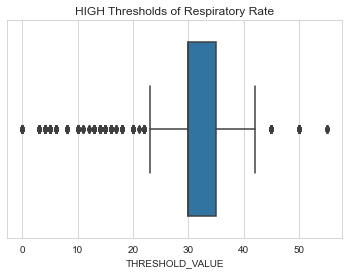

In [18]:
sns.boxplot(data=RR_threshold_high, x='THRESHOLD_VALUE').set_title('HIGH Thresholds of Respiratory Rate')
#plt.savefig('RR_threshold_HIGH.png', dpi=1200)

The minimum value of the HIGH alarm thresholds is 0, which should be at least one unit bigger than minimal value 10.

Let's check the suspiciously low HIGH alarm thresholds up to 10.

Text(0.5, 1.0, 'HIGH thresholds of Respiratory Rate up to value of 10')

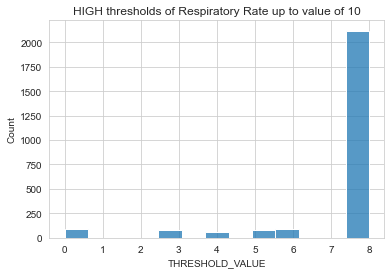

In [19]:
RR_threshold_high_under_10 = RR_violations[(RR_violations['THRESHOLD_TYPE'] == 'HIGH') & (RR_violations['THRESHOLD_VALUE'] < 10)]
sns.histplot(data=RR_threshold_high_under_10, x='THRESHOLD_VALUE').set_title('HIGH thresholds of Respiratory Rate up to value of 10')
# Decided to remove them

Text(0.5, 1.0, 'HIGH thresholds of Respiratory Rate with values from 36 onwards')

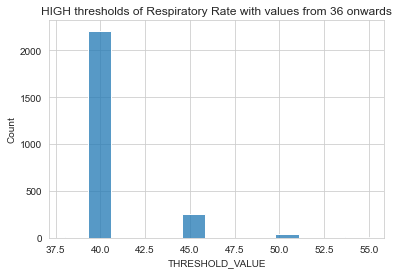

In [20]:
RR_threshold_high_over_36 = RR_violations[(RR_violations['THRESHOLD_TYPE'] == 'HIGH') & (RR_violations['THRESHOLD_VALUE'] > 36)]
sns.histplot(data=RR_threshold_high_over_36, x='THRESHOLD_VALUE').set_title('HIGH thresholds of Respiratory Rate with values from 36 onwards')
# Decided to keep these values as babies can have a HIGH threshold of up to 70 insp/min

In [21]:
RR_threshold_high = RR_violations[(RR_violations['THRESHOLD_TYPE'] == 'HIGH') & (RR_violations['THRESHOLD_VALUE'] > 10)]
RR_threshold_high.sort_values(by=['THRESHOLD_VALUE'])
display(RR_threshold_high)
RR_threshold_high.THRESHOLD_VALUE.describe() # ranges from 11 to 55 now

,ROW_ID,ICUSTAY_ID,ITEMID,CHARTTIME,VALUENUM,VALUEUOM,THRESHOLD_ROW_ID,THRESHOLD_ITEMID,THRESHOLD_CHARTTIME,THRESHOLD_VALUE,THRESHOLD_TYPE
3,188683,262147.0,220210,2108-02-22 03:50:00,38.0,insp/min,188519,224161,2108-02-21 19:34:00,35.0,HIGH
79,32059157,262154.0,220210,2105-12-07 12:19:00,34.0,insp/min,32059149,224161,2105-12-07 12:00:00,30.0,HIGH
80,32059166,262154.0,220210,2105-12-07 13:00:00,34.0,insp/min,32059149,224161,2105-12-07 12:00:00,30.0,HIGH
81,32059183,262154.0,220210,2105-12-07 15:00:00,39.0,insp/min,32059149,224161,2105-12-07 12:00:00,30.0,HIGH
82,32059207,262154.0,220210,2105-12-07 17:00:00,41.0,insp/min,32059200,224161,2105-12-07 16:00:00,30.0,HIGH
...,...,...,...,...,...,...,...,...,...,...,...
388198,14458843,262135.0,220210,2161-06-19 14:00:00,33.0,insp/min,14458802,224161,2161-06-19 09:39:00,30.0,HIGH
388201,31342643,262139.0,220210,2131-05-18 17:00:00,36.0,insp/min,31342490,224161,2131-05-18 12:45:00,30.0,HIGH
388202,31342664,262139.0,220210,2131-05-18 20:00:00,31.0,insp/min,31342490,224161,2131-05-18 12:45:00,30.0,HIGH
388207,31386205,262140.0,220210,2160-07-29 18:00:00,34.0,insp/min,31386150,224161,2160-07-29 17:08:00,30.0,HIGH


count    40732.000000
mean        31.586345
std          3.970928
min         11.000000
25%         30.000000
50%         30.000000
75%         35.000000
max         55.000000
Name: THRESHOLD_VALUE, dtype: float64

In [22]:
# Check respiratory rate alarm - LOW threshold
RR_threshold_low = RR_violations[(RR_violations['THRESHOLD_TYPE'] == 'LOW')].sort_values(by=['THRESHOLD_VALUE'])
display(RR_threshold_low)
RR_threshold_low.THRESHOLD_VALUE.describe()

,ROW_ID,ICUSTAY_ID,ITEMID,CHARTTIME,VALUENUM,VALUEUOM,THRESHOLD_ROW_ID,THRESHOLD_ITEMID,THRESHOLD_CHARTTIME,THRESHOLD_VALUE,THRESHOLD_TYPE
364926,28458100,257094.0,220210,2133-06-27 11:15:00,0.0,insp/min,28458079,224162,2133-06-27 08:00:00,1.0,LOW
224445,10393373,218982.0,220210,2162-10-03 06:00:00,0.0,insp/min,10393192,224162,2162-10-02 19:53:00,2.0,LOW
224446,10393379,218982.0,220210,2162-10-03 07:00:00,0.0,insp/min,10393192,224162,2162-10-02 19:53:00,2.0,LOW
224444,10393243,218982.0,220210,2162-10-02 23:00:00,0.0,insp/min,10393192,224162,2162-10-02 19:53:00,2.0,LOW
366552,25683562,257445.0,220210,2102-06-30 10:02:00,0.0,insp/min,25683544,224162,2102-06-30 08:30:00,2.0,LOW
...,...,...,...,...,...,...,...,...,...,...,...
165494,4930283,202559.0,220210,2152-12-02 21:00:00,15.0,insp/min,4930203,224162,2152-12-02 08:00:00,8309010.0,LOW
241461,9896915,224325.0,220210,2114-04-30 05:00:00,15.0,insp/min,9896906,224162,2114-04-30 04:02:00,8409010.0,LOW
241462,9896925,224325.0,220210,2114-04-30 06:00:00,14.0,insp/min,9896906,224162,2114-04-30 04:02:00,8409010.0,LOW
241463,9896935,224325.0,220210,2114-04-30 07:00:00,15.0,insp/min,9896906,224162,2114-04-30 04:02:00,8409010.0,LOW


count    2.744600e+04
mean     5.493915e+03
std      2.132923e+05
min      1.000000e+00
25%      8.000000e+00
50%      8.000000e+00
75%      3.500000e+01
max      8.409010e+06
Name: THRESHOLD_VALUE, dtype: float64

In [23]:
# Minimum value of LOW threshold is 1 which should be at least 10 because of investigated minimum
# Maximum value of LOW threshold is 8.409.010 which is higher than the maximal HIGH threshold that is 55
# Check how many values are too high:
RR_threshold_low_over_55 = RR_violations[(RR_violations['THRESHOLD_TYPE'] == 'LOW') & (RR_violations['THRESHOLD_VALUE'] > 55)].sort_values(by=['THRESHOLD_VALUE'])
display(RR_threshold_low_over_55)
RR_threshold_low_over_55.THRESHOLD_VALUE.describe()

,ROW_ID,ICUSTAY_ID,ITEMID,CHARTTIME,VALUENUM,VALUEUOM,THRESHOLD_ROW_ID,THRESHOLD_ITEMID,THRESHOLD_CHARTTIME,THRESHOLD_VALUE,THRESHOLD_TYPE
61952,20562488,279166.0,220210,2177-10-21 10:00:00,23.0,insp/min,20562285,224162,2177-10-20 22:00:00,58.0,LOW
61944,20562331,279166.0,220210,2177-10-21 02:00:00,24.0,insp/min,20562285,224162,2177-10-20 22:00:00,58.0,LOW
61945,20562338,279166.0,220210,2177-10-21 03:00:00,23.0,insp/min,20562285,224162,2177-10-20 22:00:00,58.0,LOW
61946,20562368,279166.0,220210,2177-10-21 04:00:00,23.0,insp/min,20562285,224162,2177-10-20 22:00:00,58.0,LOW
61947,20562421,279166.0,220210,2177-10-21 05:00:00,24.0,insp/min,20562285,224162,2177-10-20 22:00:00,58.0,LOW
...,...,...,...,...,...,...,...,...,...,...,...
165493,4930281,202559.0,220210,2152-12-02 20:07:00,17.0,insp/min,4930203,224162,2152-12-02 08:00:00,8309010.0,LOW
241464,9896945,224325.0,220210,2114-04-30 08:00:00,14.0,insp/min,9896906,224162,2114-04-30 04:02:00,8409010.0,LOW
241461,9896915,224325.0,220210,2114-04-30 05:00:00,15.0,insp/min,9896906,224162,2114-04-30 04:02:00,8409010.0,LOW
241462,9896925,224325.0,220210,2114-04-30 06:00:00,14.0,insp/min,9896906,224162,2114-04-30 04:02:00,8409010.0,LOW


count    6.094000e+03
mean     2.470768e+04
std      4.521555e+05
min      5.800000e+01
25%      8.500000e+01
50%      8.800000e+01
75%      9.200000e+01
max      8.409010e+06
Name: THRESHOLD_VALUE, dtype: float64

Text(0.5, 1.0, 'Respiratory Rate - Original LOW Thresholds (Around 8.35 Mio)')

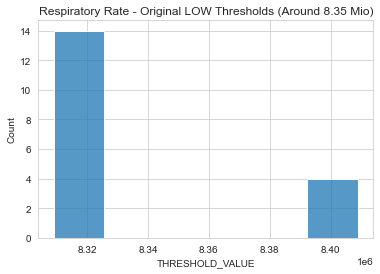

In [24]:
RR_threshold_low_8mio = RR_violations[(RR_violations['THRESHOLD_TYPE'] == 'LOW') & (RR_violations['THRESHOLD_VALUE'] > 8300000) & (RR_violations['THRESHOLD_VALUE'] < 8500000)]
RR_threshold_low_8mio.THRESHOLD_VALUE.describe() # 18x between 8,309,010 and 8,409,010
sns.histplot(data=RR_threshold_low_8mio, x='THRESHOLD_VALUE').set_title('Respiratory Rate - Original LOW Thresholds (Around 8.35 Mio)')
#plt.savefig('RR_thresholds_LOW_original_8mio.png', dpi=1200)

Text(0.5, 1.0, 'Respiratory Rate - Original LOW Thresholds (Around 835)')

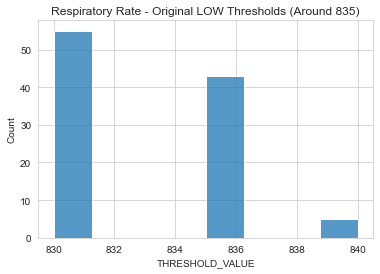

In [25]:
RR_threshold_low_800 = RR_violations[(RR_violations['THRESHOLD_TYPE'] == 'LOW') & (RR_violations['THRESHOLD_VALUE'] > 820) & (RR_violations['THRESHOLD_VALUE'] < 850)]
RR_threshold_low_800.THRESHOLD_VALUE.describe() # 103x between 830 and 840
sns.histplot(data=RR_threshold_low_800, x='THRESHOLD_VALUE').set_title('Respiratory Rate - Original LOW Thresholds (Around 835)')
#plt.savefig('RR_thresholds_LOW_original_800.png', dpi=1200)

(0.0, 1700.0)

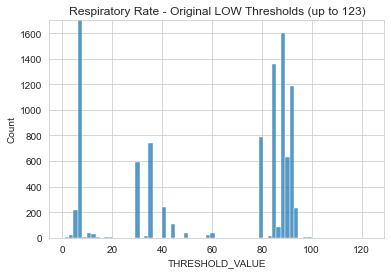

In [26]:
# plot 27,325 values between 1 and 123
RR_threshold_low_under_125 = RR_violations[(RR_violations['THRESHOLD_TYPE'] == 'LOW') & (RR_violations['THRESHOLD_VALUE'] < 125)]
RR_threshold_low_under_125.THRESHOLD_VALUE.describe()
sns.histplot(data=RR_threshold_low_under_125, x='THRESHOLD_VALUE').set_title('Respiratory Rate - Original LOW Thresholds (up to 123)')
plt.ylim(0, 1700) # one outlier (8) occuring 19,210 times
#plt.savefig('RR_thresholds_LOW_original_125.png', dpi=1200)

In [27]:
# As a higher LOW threshold than HIGH values make no sense, LOW thresholds over 55 can be removed
# Additionally, as already mentioned, LOW thresholds should be at least 10
RR_threshold_low = RR_violations[(RR_violations['THRESHOLD_TYPE'] == 'LOW') & (RR_violations['THRESHOLD_VALUE'] >= 10) & (RR_violations['THRESHOLD_VALUE'] < 55)].sort_values(by=['THRESHOLD_VALUE'])
display(RR_threshold_low)
RR_threshold_low.THRESHOLD_VALUE.describe() # ranges from 10 to 50 now

,ROW_ID,ICUSTAY_ID,ITEMID,CHARTTIME,VALUENUM,VALUEUOM,THRESHOLD_ROW_ID,THRESHOLD_ITEMID,THRESHOLD_CHARTTIME,THRESHOLD_VALUE,THRESHOLD_TYPE
36637,1315843,272914.0,220210,2183-01-20 00:00:00,9.0,insp/min,1315829,224162,2183-01-19 20:01:00,10.0,LOW
27521,2684531,270209.0,220210,2144-03-22 19:00:00,8.0,insp/min,2684418,224162,2144-03-22 08:00:00,10.0,LOW
170825,19645257,204176.0,220210,2173-05-12 21:15:00,0.0,insp/min,19645214,224162,2173-05-12 20:00:00,10.0,LOW
170824,19645244,204176.0,220210,2173-05-12 20:45:00,0.0,insp/min,19645214,224162,2173-05-12 20:00:00,10.0,LOW
170823,19645238,204176.0,220210,2173-05-12 20:30:00,0.0,insp/min,19645214,224162,2173-05-12 20:00:00,10.0,LOW
...,...,...,...,...,...,...,...,...,...,...,...
213348,21857446,215908.0,220210,2116-07-21 14:00:00,20.0,insp/min,21857400,224162,2116-07-21 12:00:00,50.0,LOW
213347,21857419,215908.0,220210,2116-07-21 13:00:00,39.0,insp/min,21857400,224162,2116-07-21 12:00:00,50.0,LOW
213346,21857392,215908.0,220210,2116-07-21 12:00:00,43.0,insp/min,21857400,224162,2116-07-21 12:00:00,50.0,LOW
228350,21191589,219885.0,220210,2168-04-17 05:00:00,17.0,insp/min,21191452,224162,2168-04-16 20:00:00,50.0,LOW


count    1829.000000
mean       33.829962
std         6.805123
min        10.000000
25%        30.000000
50%        35.000000
75%        35.000000
max        50.000000
Name: THRESHOLD_VALUE, dtype: float64

After data cleaning, the lower threshold (LOW) of the respiratory rate ranges from 10 to 50 and the upper threshold (HIGH) ranges from 11 to 55.

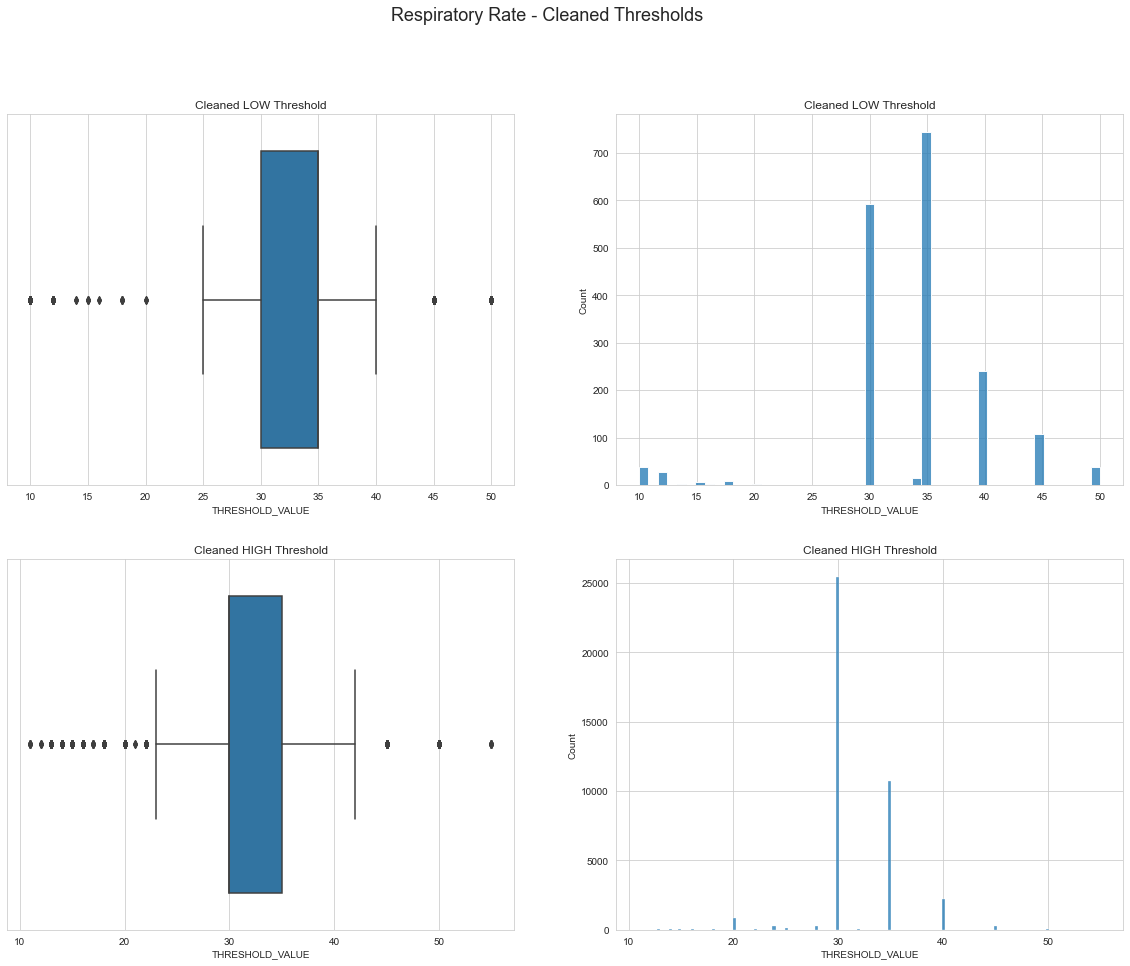

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Respiratory Rate - Cleaned Thresholds', fontsize=18)

sns.boxplot(data=RR_threshold_low, x='THRESHOLD_VALUE', ax=axs[0][0])
axs[0][0].set_title('Cleaned LOW Threshold')
axs[0][0].set_xlabel('THRESHOLD_VALUE')

sns.histplot(data=RR_threshold_low, x='THRESHOLD_VALUE', ax=axs[0][1])
axs[0][1].set_title('Cleaned LOW Threshold')
axs[0][1].set_xlabel('THRESHOLD_VALUE')

sns.boxplot(data=RR_threshold_high, x='THRESHOLD_VALUE', ax=axs[1][0])
axs[1][0].set_title('Cleaned HIGH Threshold')
axs[1][0].set_xlabel('THRESHOLD_VALUE')

sns.histplot(data=RR_threshold_high, x='THRESHOLD_VALUE', ax=axs[1][1])
axs[1][1].set_title('Cleaned HIGH Threshold')
axs[1][1].set_xlabel('THRESHOLD_VALUE')

plt.show(fig)

# TODO: remove LOW thresholds over 30?

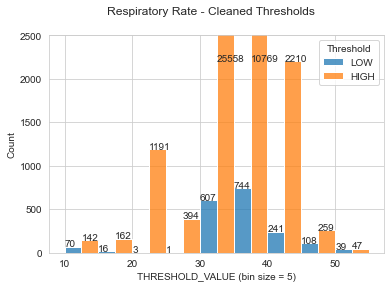

In [29]:
df = pd.concat(axis=0, ignore_index=True, objs=[
    pd.DataFrame.from_dict({'THRESHOLD_VALUE': RR_threshold_low['THRESHOLD_VALUE'], 'Threshold': 'LOW'}),
    pd.DataFrame.from_dict({'THRESHOLD_VALUE': RR_threshold_high['THRESHOLD_VALUE'], 'Threshold': 'HIGH'})
])
fig, ax = plt.subplots()
fig.suptitle('Respiratory Rate - Cleaned Thresholds', fontsize=12)
sns.histplot(data=df, x='THRESHOLD_VALUE', hue='Threshold', multiple='dodge', bins=range(10, 60, 5), ax=ax)
ax.set_xlabel('THRESHOLD_VALUE (bin size = 5)')

plt.ylim(0, 2500)
for p in ax.patches:
    if p.get_height() > 2200:
        ax.text(x=p.get_x(), y=2200, s=p.get_height())
    else:
        ax.text(x=p.get_x(), y=p.get_height(), s=p.get_height())
#plt.savefig('RR_thresholds_clean.png', dpi=1200)